# A Simple Bucket Hydrology Model
## April 9, 2018


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
Nt = 100
dt = 1.0

P = np.zeros((Nt,1))
P[19:39] = 4.0
print(P.shape)

t = np.arange(1,Nt+1,1)
print(t.shape)


(100, 1)
(100,)


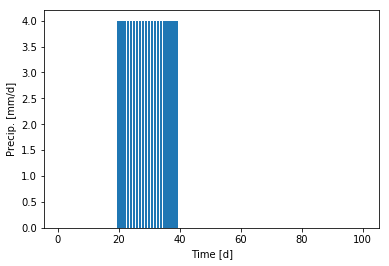

In [10]:
plt.figure(1)
plt.bar(t,P)
plt.ylabel('Precip. [mm/d]')
plt.xlabel('Time [d]')
plt.show()


In [13]:
k1 = 0.02 # Drainage coefficient in units of day^-1
W1_0 = 250.0 # Water storage in units of mm

# Initializing a data container for our water storage at each time step
W1 = np.zeros(t.shape)

# Update initial condition
W1[0] = W1_0

# Initializing a data container for our discharge at each time step
Q  = np.zeros(t.shape)

# Update initial condition
Q[0] = k1*W1[0]

# The main loop
for i in np.arange(1,Nt,1):
    
    # Compute the value of the derivatives
    dW1dt = P[i-1] - k1*W1[i-1]
    
    # Compute the next value of W
    W1[i] = W1[i-1] + dW1dt*dt
    
    # Compute the next value of Q
    Q[i] = k1*W1[i]

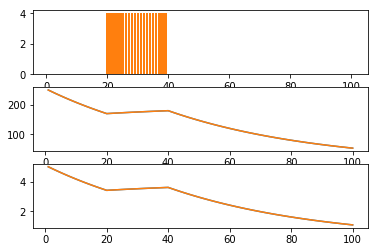

In [16]:
plt.figure(2)
plt.subplot(311)
plt.bar(t,P)
plt.subplot(312)
plt.plot(t,W1)
plt.subplot(313)
plt.plot(t,Q)
plt.show()
